# Exploring Chicago Food Inspections: 2011-2019

**Jennifer Sikora** <br>
**IS590-DV** <br>
**April 25, 2019**

Welcome to the Jupyter Notebook by Jennifer Sikora, in which we will explore the Chicago Department of Public Health's Food Inspections dataset. Each row in the dataset represents a food inspection. According to the description PDF accompanying the data, "This dataset contains information from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present."

Every year, the Chicago Department of Public Health conducts over thirteen thousand food inspections per year, across over four hundred facility types, including restaurants, day care centers, hospitals, mobile food dispensers, and taverns, to name a few. This dataset is updated every Friday.

Please see the Resources section at the end of this document for the link to the full dataset. For the purposes of my visualizations, I have cleaned and paired down the dataset so it is more manageable. 

In [2]:
# Import libraries
import pandas as pd
import bqplot
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
import traitlets
import ipywidgets
import collections

In [3]:
# Importing the cleaned data:
inspections = pd.read_csv("https://jsikora3.github.io/inspections-cleaned.csv")

In [4]:
# Importing the cleaned data for top 5 facility types; 2018 inspections only:
inspections_top5_2018 = pd.read_csv("https://jsikora3.github.io/inspections_top5_2018.csv")

## Visualizing the Number of Food Inspections by Year

### Exploring Counts

I will first visualize the count of inspections by year. As you can see below, the number of food inspections by year has remained fairly steady. Since the dataset was downloaded at the end of March 2019, the number of food inspections for 2019 is far lower than previous years. Additionally, it is important to note that effective February 1, 2019, the City of Chicago implemented new requirements that all food service establishments must follow” (see https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html for more information). 

Now, back to the visualizations: the first plot shows that there was a marked decline in the number of inspections conducted in 2018. Additionally, a greater percentage of those inspections were given a "Passed With Conditions" result. I do not know if the number of inspections fell in 2018, or perhaps the way the inspections were input into the database changed in 2018, resulting in the appearance that there were fewer inspections. The second plot shows that while the majority of the facilities do pass their inspections, there are still quite a few that passed with conditions or failed. 

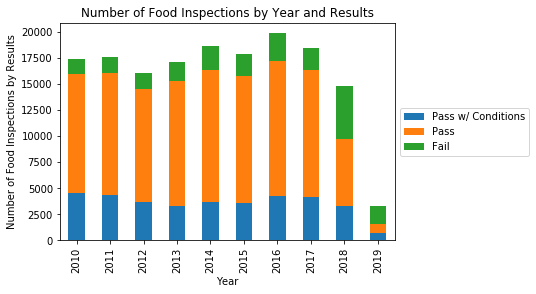

In [6]:
(inspections
 .groupby(['year', 'Results'])
 .size()
 .unstack()
 .plot.bar(stacked=True)
)

plt.xlabel("Year")
plt.ylabel("Number of Food Inspections by Results")
plt.title("Number of Food Inspections by Year and Results")
plt.legend(inspections["Results"].unique(), loc='center left', bbox_to_anchor=(1, 0.5))

### Exploring Inspection Types

Although the dataset documentation lists only 7 inspection types, the dataset shows that there are many more inspection types listed. 

Here are the inspection types I expected to find in the dataset: 

* Canvass
* Consultation
* Complaint
* License
* Suspected Food Poisoning
* Task Force Inspection
* Re-Inspections

Below you will see that there are actually 103 unique inspection types used in the data. Since this is an unruly number of inspection types to visualize, I narrowed down the options to the top 6 and plotted the inspection types by year (task force were excluded since the way they were entered into the dataset is not consistent). 

In [7]:
inspections["Inspection Type"].nunique() 

103

In [8]:
collections.Counter(inspections['Inspection Type'])

Counter({'License': 22148,
         'License Re-Inspection': 8421,
         'Canvass Re-Inspection': 18869,
         'Complaint': 16424,
         'Canvass': 77651,
         'Complaint Re-Inspection': 6896,
         'Recent Inspection': 281,
         'Suspected Food Poisoning': 815,
         'Short Form Complaint': 6408,
         'Suspected Food Poisoning Re-inspection': 185,
         'Consultation': 656,
         'Non-Inspection': 13,
         'Recent inspection': 1,
         'Special Events (Festivals)': 62,
         'Tag Removal': 603,
         nan: 1,
         'Complaint-Fire Re-inspection': 43,
         'Complaint-Fire': 154,
         'Short Form Fire-Complaint': 104,
         'License-Task Force': 603,
         'CORRECTIVE ACTION': 1,
         'OWNER SUSPENDED OPERATION/LICENSE': 1,
         'LICENSE CONSULTATION': 2,
         'License consultation': 1,
         'Task Force Liquor 1475': 254,
         'Package Liquor 1474': 44,
         'Illegal Operation': 5,
         'fire compl

In [10]:
# Narrow down inspection types included in the dataset:
inspections2 = inspections[inspections["Inspection Type"].isin(["Canvass", 
                                                   "Consultation", 
                                                   "Complaint",
                                                  "License",
                                                  "Suspected Food Poisoning",
                                                  "License Re-Inspection",
                                                 "Canvass Re-Inspection",
                                                  "Complaint Re-Inspection",
                                                    "Suspected Food Poisoning Re-inspection"])]

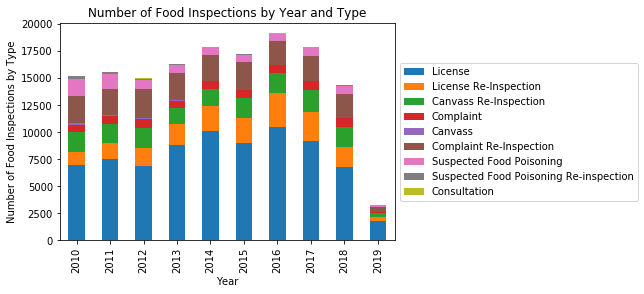

In [11]:
(inspections2
 .groupby(['year', 'Inspection Type'])
 .size()
 .unstack()
 .plot.bar(stacked=True)
)

plt.xlabel("Year")
plt.ylabel("Number of Food Inspections by Type")
plt.title("Number of Food Inspections by Year and Type")
plt.legend(inspections2["Inspection Type"].unique(), loc='center left', bbox_to_anchor=(1, 0.5))

Text(0.5, 1.0, 'Number of Food Inspections by Results Type')

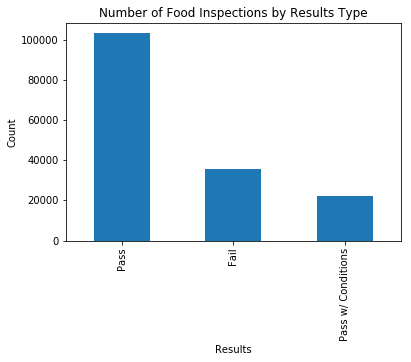

In [12]:
inspections["Results"].value_counts().plot(kind="bar")
plt.xlabel("Results")
plt.ylabel("Count")
plt.title("Number of Food Inspections by Results Type")

## Exploring 2018 Food Inspection Results with an Interactive Dashboard

Since there are 462 facility types in the original dataset, and any visualization featuring all 462 types would be challenging to decipher, subsequent visualizations will use a dataset using data from the top 5 facility types:

* Restaurant
* Grocery Store
* School
* Children's Services Facility
* Bakery

It should also be noted that since the original dataset spans a fairly wide time frame, and some of the business are closed, the visualizations presented here will only organizations that received one of the following results:

* Pass: This means there were no priority or priority foundation violations noted during the inspection.
* Pass with Conditions: This means there were one or more priority or priority foundation violations identified, but all of them were corrected onsite.
* Fail: This means one or more priority or priority foundation violations were identified that could not be corrected during the inspection.

Using only the food inspections from 2018, I created an interactive dashboard that shows the number of food inspections by the top 5 facility types and the results.

By clicking on a cell of the heatmap, you will see a plot of the location of facilities that fall within that category. For instance, if you would like to see which restaurants failed their inspections in 2018, click on the appropriate cell on the heatmap and a scatterplot will show up on the right. When you hover over a point in the scatterplot, you will see the name, address, and risk level of that specific facility. 

The risk level is used to determine how often the facility should be inspected:

* Risk 1 facilities are inspected 1-2 times per year
* Risk 2 facilities are inspected once a year
* Risk 3 facilities are inspected every other year

Given this distinction between the risk categories, it is most important to know which facilities are marked with Risk 1, because while they have passed their inspection, they are the riskiest facilities in terms of food safety and public health and are inspected more frequently. 

In [13]:
# Variables for the heatmap

x = inspections_top5_2018['Results']
y = inspections_top5_2018['Facility Type']
z = inspections_top5_2018['Results']

In [14]:
xnames = x.unique()
ynames = y.unique()
znames = np.zeros([len(xnames),len(ynames)])

# Loop and fill
for i,xn in enumerate(xnames):
   for j, yn in enumerate(ynames):
       mask = (x == xn) & (y == yn)
       znames[i,j] = z[mask].value_counts()

In [15]:
# Variables for the scatterplot

long = inspections_top5_2018["Longitude"]
lat = inspections_top5_2018["Latitude"]
risks = inspections_top5_2018["Risk"]
names = inspections_top5_2018["DBA Name"]
addresses = inspections_top5_2018["Address"]

In [18]:
# Grammar of Graphics
# PART I: HEATMAP
# Scales
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.OrdinalScale()
col_sc = bqplot.ColorScale(scheme="Blues")

# Axes
x_ax = bqplot.Axis(scale=x_sc, 
                   label='Facility Type',
                   tick_rotate=-30,
                   tick_style={'tick-offset':'10px', 'text-anchor':'middle'})
y_ax = bqplot.Axis(scale=y_sc, orientation='vertical',
                   label='Results')
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')

# Marks
heat_map = bqplot.GridHeatMap(color=znames,
                              row=xnames,
                              column=ynames,
                             scales = {'row':y_sc,
                                      'column':x_sc,
                                      'color':col_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'gray'},
                              selected_style = {'opacity':1.0},
                              unselected_style = {'opacity':0.8}
                             )

# Create figure
fig_heatmap = bqplot.Figure(marks=[heat_map], axes=[x_ax, y_ax, c_ax],
                   title="Results by Facility Type")

# PART II: SCATTERPLOT
# Scales 
x_sc2 = bqplot.LinearScale()
y_sc2 = bqplot.LinearScale()
c_sc2 = bqplot.OrdinalColorScale(domain=risks.unique().tolist(), 
                               colors=bqplot.CATEGORY10[:4])

# Axes
x_ax2 = bqplot.Axis(scale=x_sc2, 
                    label='Longitude')
y_ax2 = bqplot.Axis(scale=y_sc2, label='Latitude', orientation='vertical')
c_ax2 = bqplot.ColorAxis(scale=c_sc2, 
                         label="Risk", 
                         orientation="vertical",
                         side="right")

# Tooltip
# create names for each lat & long x/y positions
infos = []
for i in range(len(long)):
    infos.append("Business Name: " + names[i] +
                 ", Address: " + addresses[i] +
                 ", " + risks[i])
tt = bqplot.Tooltip( fields = ['name'], labels =['Info'], show_labels=False)


# Marks
# Scatters:
scatters = bqplot.Scatter(x=long, 
                          y=lat, 
                          color=risks,
                          names=infos,
                          scales={'x':x_sc2, 'y':y_sc2, 'color':c_sc2},
                          tooltip=tt, 
                          display_names=False
                         )

# Create figure
fig_scatters = bqplot.Figure(title="Location of Facilities", 
                    marks=[scatters], axes=[x_ax2,y_ax2, c_ax2])

# Label
mySelectedLabel = ipywidgets.Label()

# Linking Function
def get_data_value2(change):
    i,j = change['owner'].selected[0]
    v = znames[i,j]
    mySelectedLabel.value = 'Total number of inspections = ' + str(v)

    mask = ( (inspections_top5_2018["Results"].values==xnames[i]) & 
            (inspections_top5_2018["Facility Type"].values==ynames[j]) )

    scatters.x = long[mask]
    scatters.y = lat[mask]

heat_map.observe(get_data_value2, 'selected')

ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([fig_heatmap,fig_scatters])])

## Conclusion

In conclusion, the dashboard shows that there is not a specific area of the city where facilities are more likely to pass or fail the inspections; rather, the results are pretty evenly spread across the city. 

### Future Improvements for the Visualizations
The dataset documentation notates that there are 45 distinct violations, all of which are listed within one field within the dataset. In another iteration of this project, I would like to parse through the violations to determine which is most frequent. Additionally, I would have liked to spend more time cleaning the dataset before attempting to plot anything. For instance, the Inspection Type field is particularly messy, and it would have been beneficial to clean all of the records so the plots were more accurate. 

## Resources
* Food Inspections, Chicago Department of Public Health's Food Protection Program. Chicago Data Portal. Accessed April 1, 2019. URL: https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5 
* "Understand Health Code Requirements for Food Establishments." City of Chicago. Accessed April 19, 2019. URL: https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/understand_healthcoderequirementsforfoodestablishments.html
* "Food Protection Services." City of Chicago. Accessed April 19, 2019. URL: https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html
* "Chicago Food Code Major Changes." City of Chicago. Accessed April 19, 2019. URL: https://www.chicago.gov/content/dam/city/depts/cdph/food_env/general/Food_Protection/2019_ChicagoFoodCodeMajorChanges.pdf
* "Food Inspections." City of Chicago. Accessed April 19, 2019. URL: https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF
* "Food Protection Program: Frequently Asked Questions." Chicago Department of Public Health. Accessed April 19, 2019. https://www.chicago.gov/content/dam/city/depts/cdph/food_env/general/Food_Protection/Inspection_FAQ_2019.pdf